<a href="https://colab.research.google.com/github/Vicky-57/Heart-disease-Analysis-using--KNN/blob/main/Heart_Disease_Analysis_vikas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/colabnotebook/heart.csv')
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   gender    1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


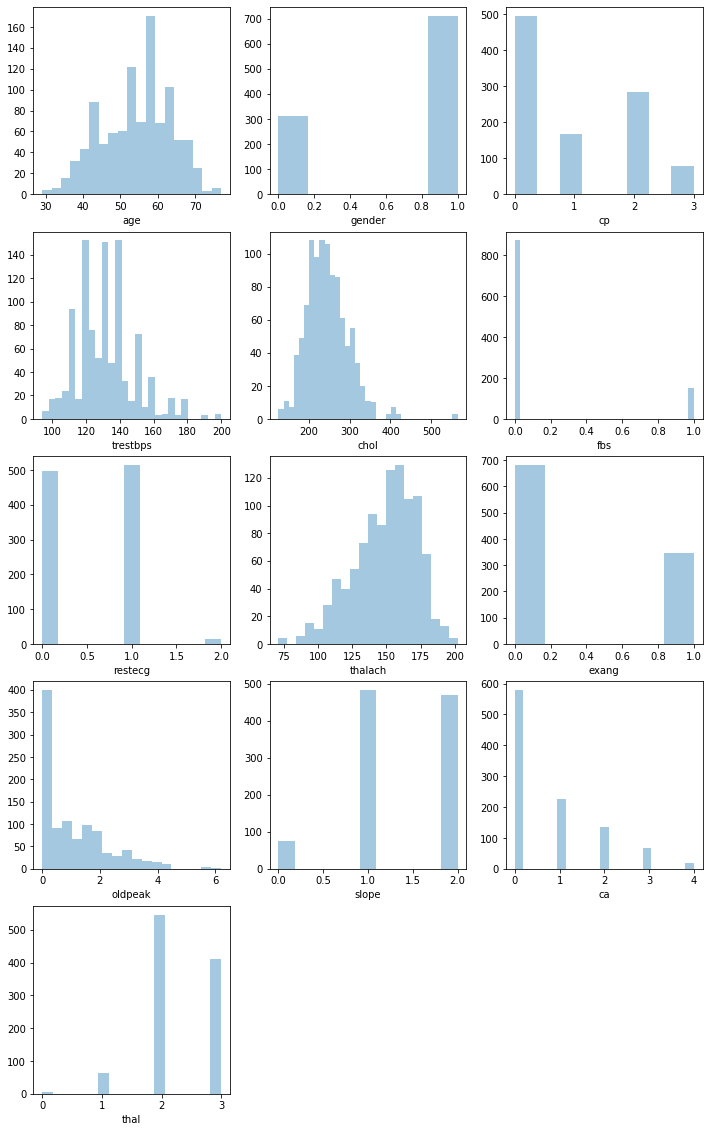

In [ ]:
# Histogram
col = df.columns
plt.figure(figsize=(12,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.distplot(df[col[i]],kde=False)
plt.show()

In [ ]:
# Now focus on presence or non-presence of heart disease
df_1 = df[df.target==1]
df_0 = df[df.target==0]

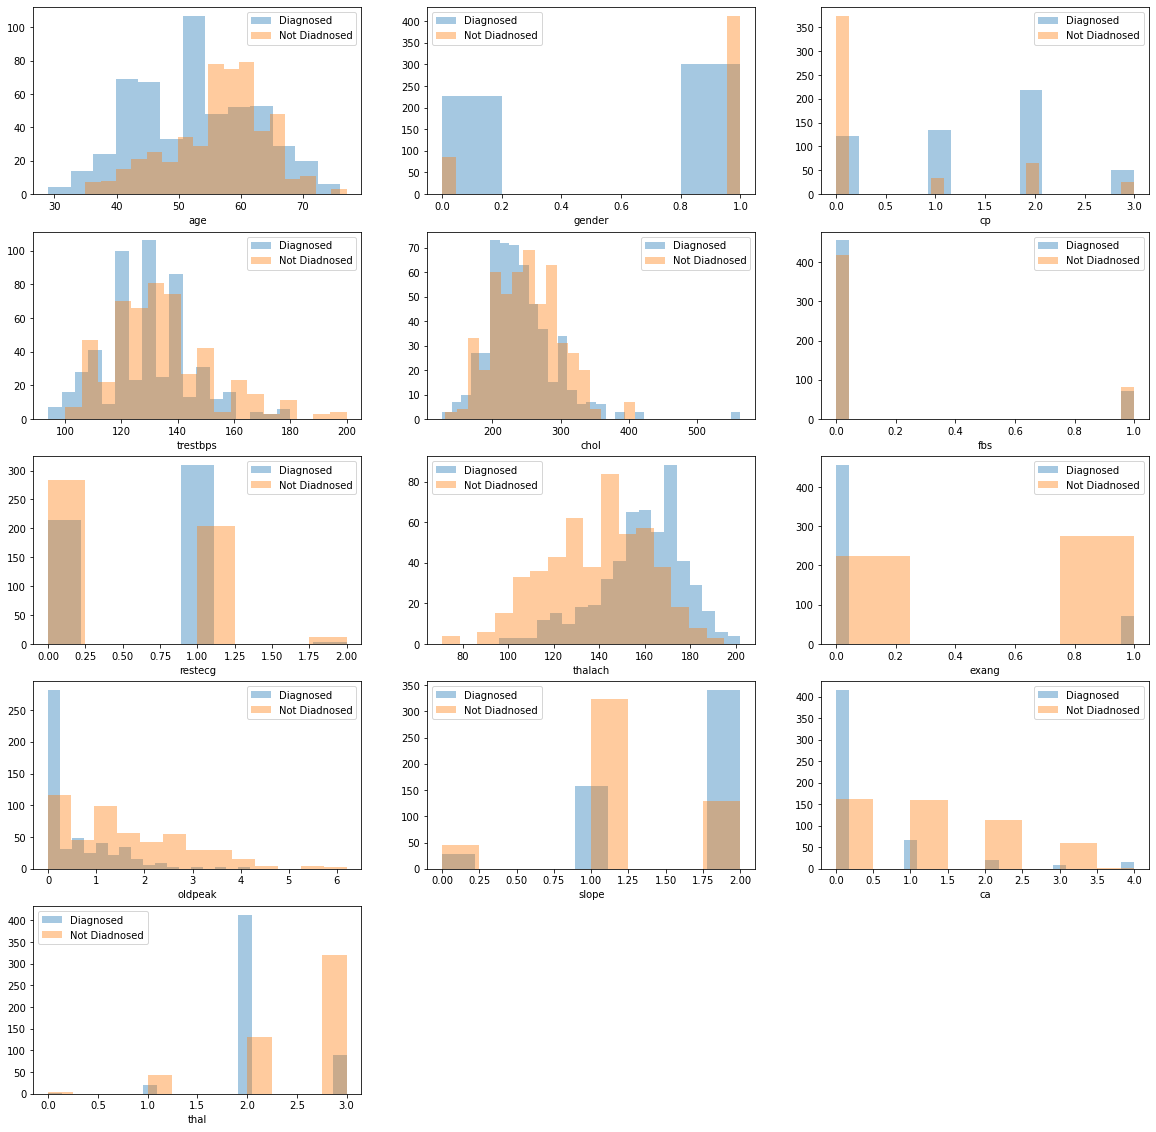

In [ ]:
#Histogram after classification
col = df.columns
plt.figure(figsize=(20,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.distplot(df_1[col[i]],kde=False, label='Diagnosed')
  sns.distplot(df_0[col[i]],kde=False, label='Not Diadnosed')
  plt.legend()
plt.show()

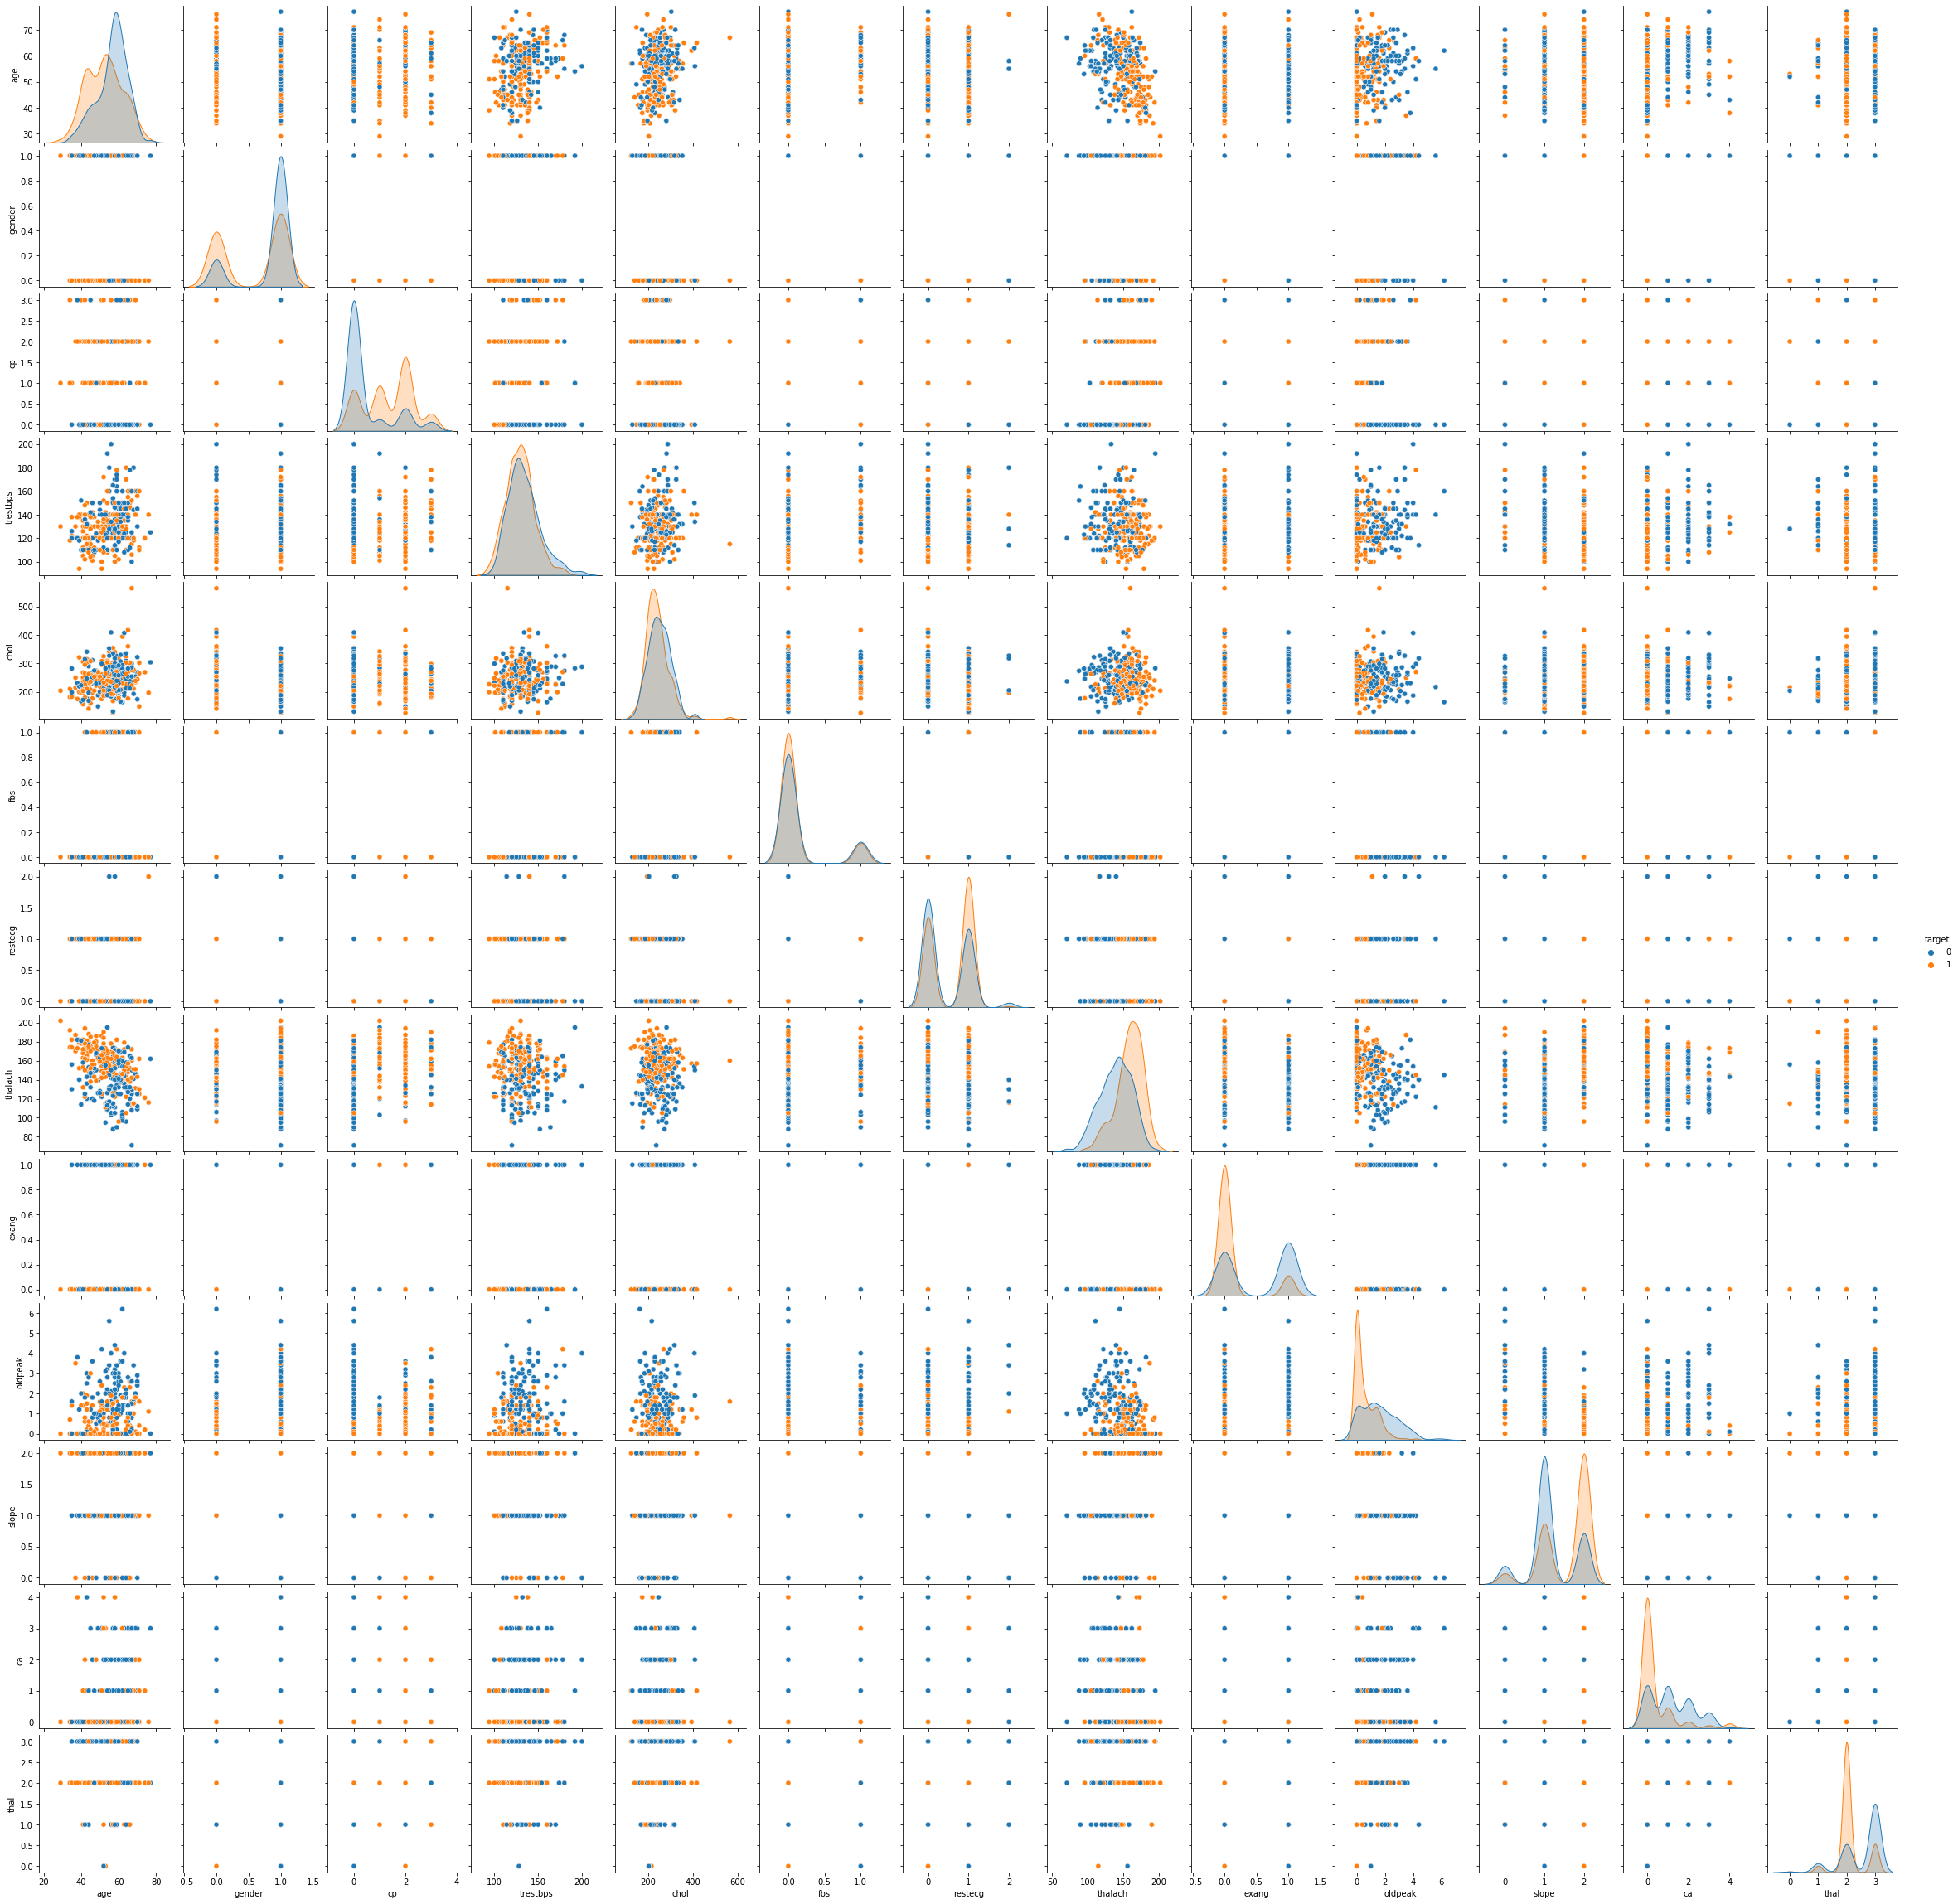

In [ ]:
#Pairwise bivariate distribution
sns.pairplot(df, hue= 'target')

In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

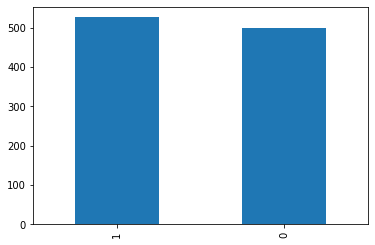

In [ ]:
df.target.value_counts().plot(kind='bar')

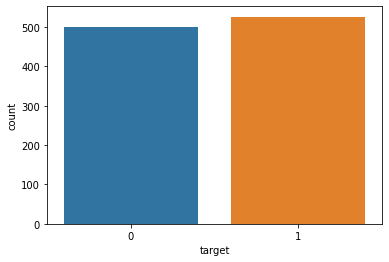

In [ ]:
#Count plot
sns.countplot(x='target', data=df)

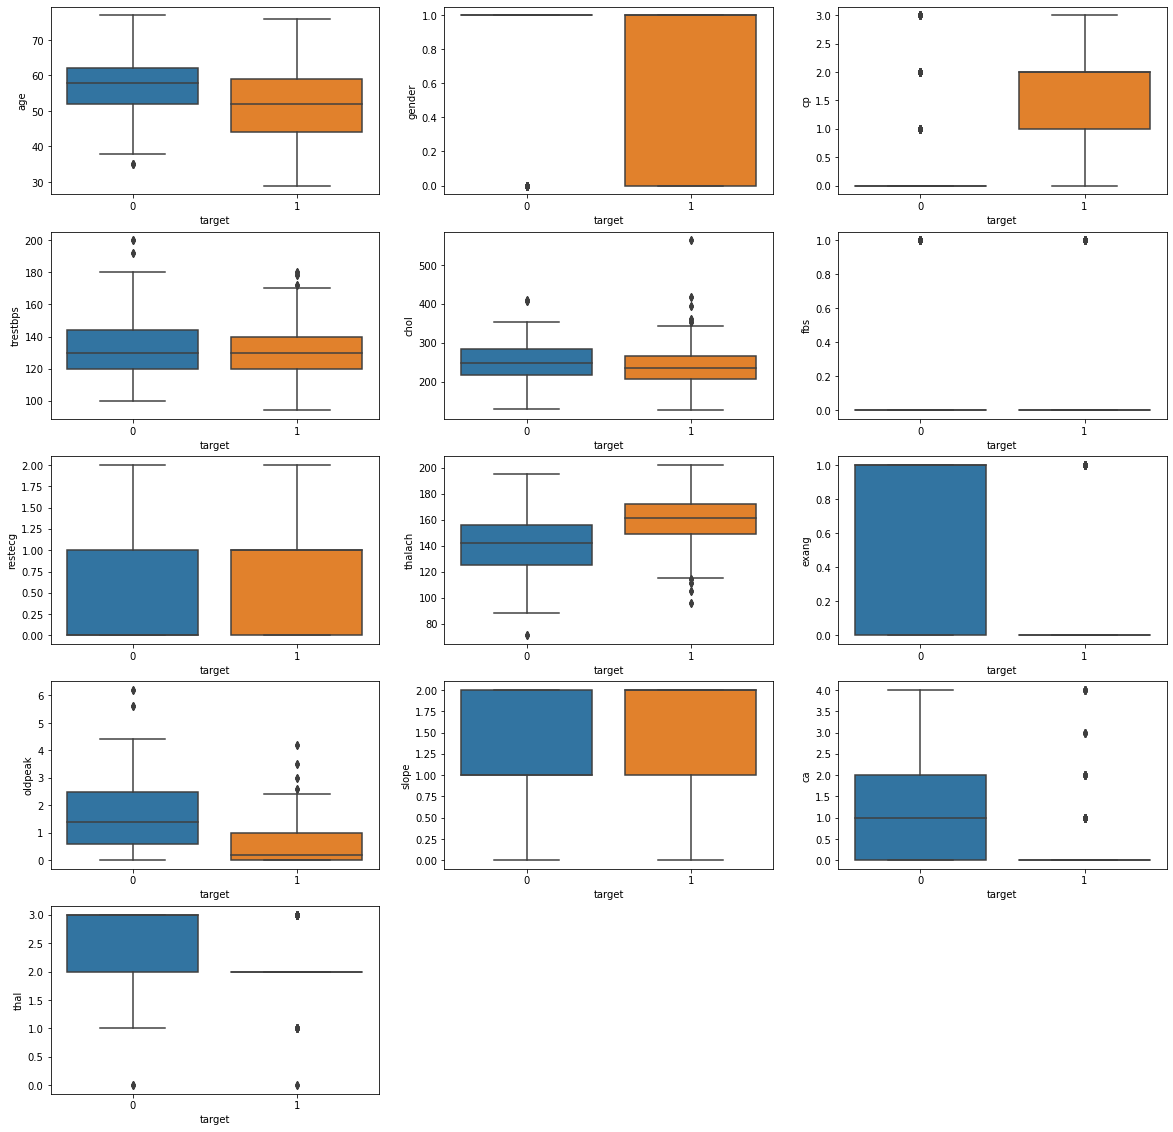

In [ ]:
#Analyse to column with respect to Outcome
col = df.columns
plt.figure(figsize=(20,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.boxplot(x='target', y=col[i], data=df)
plt.show()

In [ ]:
#Model creation
x= df.iloc[:,0:13]
y= df.iloc[:,13:]
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=17)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
#Training
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Prediction for the test data on the basis of training
pred=model.predict(x_test)
pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [ ]:
#Prediction on new data
print("1->true,2->false")
age= int(input('Enter the age :'))
gender= int(input('Enter the gender(0=Male,1=Female):'))
cp= int(input('Enter the chest pain type :'))
trestbps= int(input('Enter the resting bp :'))
chol= int(input('Enter the serum cholestrol in mg/dl :'))
fbs= int(input('Enter the fasting blood sugar>120 mg/dl (1,0) :'))
restecg= int(input('Enter the resting ECG :'))
thalach= int(input('Enter the max heart rate :'))
exang= int(input('Enter the exercise induced angina:'))
oldpeak= float(input('Enter the oldpeak :'))
slope= int(input('Enter the slope of the peak exercise ST segment:'))
ca= int(input('Enter the number of major vessels (0-3) colored by flourosopy:'))
thal= int(input('0 = normal; 1 = fixed defect; 2 = reversable defect:'))
mypred = model.predict([[age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
if mypred==1:
  print('Diagoned with heart disease')
else:
  print('Not diagoned with heart disease')

1->true,2->false
Enter the age :50
Enter the gender(0=Male,1=Female):0
Enter the chest pain type :0
Enter the resting bp :125
Enter the serum cholestrol in mg/dl :222
Enter the fasting blood sugar>120 mg/dl (1,0) :0
Enter the resting ECG :1
Enter the max heart rate :180
Enter the exercise induced angina:0
Enter the oldpeak :1.0
Enter the slope of the peak exercise ST segment:2
Enter the number of major vessels (0-3) colored by flourosopy:2
0 = normal; 1 = fixed defect; 2 = reversable defect:2
Diagoned with heart disease


# **KNN**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier()

In [ ]:
#Training
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#Prediction for the test data on the basis of training
pred1=model1.predict(x_test)
pred1

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [ ]:
#Prediction on new data
print("1->true,2->false")
age= int(input('Enter the age :'))
gender= int(input('Enter the gender(0=Male,1=Female):'))
cp= int(input('Enter the chest pain type :'))
trestbps= int(input('Enter the resting bp :'))
chol= int(input('Enter the serum cholestrol in mg/dl :'))
fbs= int(input('Enter the fasting blood sugar>120 mg/dl (1,0) :'))
restecg= int(input('Enter the resting ECG :'))
thalach= int(input('Enter the max heart rate :'))
exang= int(input('Enter the exercise induced angina:'))
oldpeak= float(input('Enter the oldpeak :'))
slope= int(input('Enter the slope of the peak exercise ST segment:'))
ca= int(input('Enter the number of major vessels (0-3) colored by flourosopy:'))
thal= int(input('0 = normal; 1 = fixed defect; 2 = reversable defect:'))
mypred = model.predict([[age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
if mypred==1:
  print('Diagoned with heart disease')
else:
  print('Not diagoned with heart disease')

1->true,2->false
Enter the age :56
Enter the gender(0=Male,1=Female):0
Enter the chest pain type :0
Enter the resting bp :125
Enter the serum cholestrol in mg/dl :300
Enter the fasting blood sugar>120 mg/dl (1,0) :0
Enter the resting ECG :1
Enter the max heart rate :133
Enter the exercise induced angina:0
Enter the oldpeak :2.9
Enter the slope of the peak exercise ST segment:2
Enter the number of major vessels (0-3) colored by flourosopy:2
0 = normal; 1 = fixed defect; 2 = reversable defect:2
Not diagoned with heart disease


ModelEvaluation

In [ ]:
#Logistic regression model accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression Model :' , accuracy_score(y_test,pred))

Accuracy of Logistic Regression Model : 0.8732943469785575


In [ ]:
#KNN model accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of KNN Model :' , accuracy_score(y_test,pred1))

Accuracy of KNN Model : 0.7212475633528265


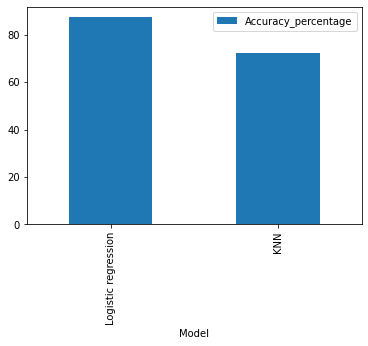

In [ ]:
data = [['Logistic regression',(accuracy_score(y_test,pred)*100)],['KNN',(accuracy_score(y_test,pred1)*100)] ]
a = pd.DataFrame(data, columns=['Model','Accuracy_percentage'])
a.plot(kind='bar',x='Model',y='Accuracy_percentage')